## Tarea 5 (cambiando Tmuestreo y tiempo de toma de datos)

Comience corriendo el programa EjemTransfFourier.m con Tmuestreo=0.001 y TGrabacion=10, ahora aumente el tiempo de muestro 10 veces (Tmuestreo=0.01) y aumente el tiempo de grabación en 100 (TGrabacion=100), finalmente haga otra corrida con Tmuestreo=0.0001 y TGrabacion=1.

Muestre la señal y la transformada de Fourier de los 3  experimentos.

¿de que tamaño es vfrec para los 3 casos?¿qué diferencias encuentra entre los vfrec? ¿cuánto valen las frecuencias máximas? ¿el incremento entre frecuencias vecinas (deltaf)?

Basado en los resultados anteriores conteste a la siguientes preguntas:

Si usted tiene un sistema donde se está discretizando una señal y puede modificar el tiempo de muestreo y el tiempo de grabación, que cambiaría si:

- Usted quiere mejorar la resolución en f y quiere distinguir entre dos señales que son muy parecidas en frecuencia.

- Usted quiere saber si alguna señal de alta frecuencia está presente en la señal de muestreo. 

In [66]:
%matplotlib inline
from numpy.fft import fft,fftshift,ifftshift
from numpy import arange,cos,abs,angle,pi,floor
import matplotlib.pyplot as plt

## Parámetro para el muestreo de los datos en el dominio del tiempo

In [67]:
T_muestreo = 0.0001 # Periodo de muestreo
t_grabacion = 1 # Tiempo total de grabacion de datos (segundos)
# Formamos un array que va desde 0 a t_grabacion-Tmuestreo con incrementos de T_muestreo
t = arange(0,t_grabacion,T_muestreo)

## Construyendo señal a analizar

Se tratará una señal cosenoidal de amplitud 1 y frecuencia 2 Hz

In [68]:
frecSenal = 1   # Queremos un coseno de 1 Hz de frecuencia
A = 1   # Queremos que el coseno sea de amplitud 1
w = 2*pi*frecSenal  # Frecuencia angular
senal = A*cos(w*t)    # Construimos la señal coseniodal de amplitud 1 y frecuencia 1 Hz 

## Graficando la señal original

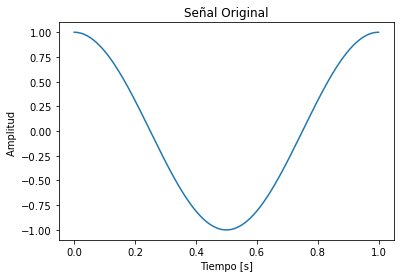

In [69]:
plt.plot(t,senal)
plt.title("Señal Original")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud ")
plt.savefig("Senal_in_1sG_0001sT.png")

## Calculando la transformada de Fourier

In [70]:
fft_senal = fft(senal)

## Definición de función para correr la señal

#### Parámetros:
datos: array de la señal original
T_muestreo: Periodo de muestreo de los datos
#### Retorna:
vfreq: un array con los elementos ordenados comenzando con los valores negativos pasando por 0 hasta los positivos para poder interpretar mejor la fft

In [71]:
def calcVecFrec(datos,PeriodoMuestreo):
    #Esta funcion calcula el vector de los valores de la frecuencia (en Hz) en el
    #espacio de Fourier de una secuencia guardada en el vector datos,
    #PeriodoMuest, es el tiempo transcurrido entre medición y medición
    N = len(datos) # Calculamos la longitud de los datos
    TiempoCompleto=PeriodoMuestreo*N #Calculamos el tiempo total (de medición) de la señal
    #Verificamos si la cantidad de datos es par o impar
    if(N%2 == 0):
        # Construímos un vector que va de -int(N/2) hasta int(N/2)-1 en incrementos de 1 en 1
        vfreq = arange(-floor(N/2),floor(N/2),1)
    else:
        # Construimos un vector que va de -int(N/2) hasta int(N/2) en incrementos de 1
        vfreq = arange(-floor(N/2),floor(N/2)+1,1)
    # Hasta este punto las unidades de vfreq serán (repeticiones)
    # Queremos convertirlas a Hz como en el caso de la fft, así que dividiremos
    # entre el tiempo completo de medicion
    vfreq /= TiempoCompleto # Aqui las unidades son Hertz
    # Corremos el arreglo de tal forma que quede identico a la parte del dominio de la gráfica de
    # la transformada de fourier

    # Lo que hace ifffshift es correr un arreglo hacia la izquierda por ejemplo:
    # si vfreq = [-2,-1,0,1,2] ---> [-1,0,1,2,-2] ---> [0,1,2,-2,-1]
    vfreq = ifftshift(vfreq) # Corremos el arreglo
    return vfreq

## Creamos un array con exactamente los mismos valores del dominio en la frecuencia de la transfromada de fourier

In [72]:
vfreq = calcVecFrec(datos=senal,PeriodoMuestreo=T_muestreo)

## Graficando la FFT 

Notese que estamos corriendo nuevaente la fft tanto en dominiio (vfreq) como en sus valores (abs(FFTsenal))

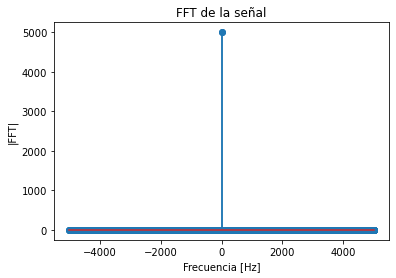

In [73]:

plt.stem(fftshift(vfreq),abs(fftshift(fft_senal)))
plt.title("FFT de la señal")
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('|FFT|')
plt.savefig("FFT_senal_out_nn_1sG_0001sT.png")

## Aunque parece que solo hay un contribución, observe que...

## Normalizando la magnitud de la FFT

Dado que en la grafica de la FFT (magnitud) cuando sumamos todas las contribuciones, nos da el número total de datos, es decir, la longitud del array de la FFT, podemos normalizar (para interpretar, necesitamos decir cuales son las unidades de FFT) a 1, dividiendo entre la cantidad de datos, así, la suma de todas las contribuciones dara siempre 1.

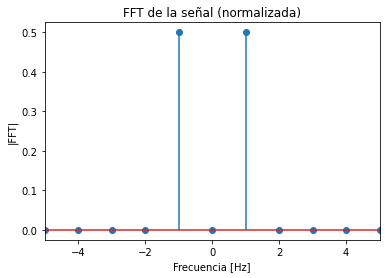

In [74]:
plt.stem(fftshift(vfreq),abs(fftshift(fft_senal))/len(fft_senal))
plt.title("FFT de la señal (normalizada)")
plt.xlabel('Frecuencia [Hz]')
plt.ylabel('|FFT|')
plt.xlim([-5,5])
plt.savefig("FFT_senal_out_1sG_0001sT.png")

# Tamaño de Vfreq

In [75]:
print(len(vfreq))

10000


# Frecuencias máximas

In [76]:
print(vfreq.max(),vfreq.min())

4999.0 -5000.0


# $\delta f$

In [77]:
print(vfreq[1]-vfreq[0])

1.0


## Conclusiones

El tamaño de vfreq para los 3 experimentos es:

- 10000
- 10000
- 10000

Los valores de $\delta f$ son:

- 0.1
- 0.01
- 1.0

Los valores máximos de vfreq son:

- 499.9 y -500
- 49.99 y -50.00
- -4999 y -5000

No hay diferencias en la longitud del vfreq (variable que controla el dominio en el espacio de Fourier), pero si que existen diferencias entre el valor máximo y mínimo de este vector, pues, este crece o decrece a medida que $T_{muestreo}$ crece o decrece, es decir, el valor máximo de vfreq será mayor si $T_{muestreo}$ es más pequeño, y menor, si $T_{muestreo}$ es mayor.

Por su parte, el tiempo de grabación controla la resolución en el espacio de las frecuencias, es decir, $\delta f$ será mayor si el tiempo de grabación es menor, y $\delta f$ es menor si el tiempo de grabación es mayor.

# Respuestas 

- ¿Qué cambiaria si quiere mejorar la resolución en f y quiere distinguir entre dos señales que son muy parecidas en frecuencia?

Para mejorar la resolución en el espacio de las frecuencias, se debe aumentar el tiempo de grabación, esto permitirá distinguir mejor las frecuencias características de cada señal, pero para distinguir de manera apropiada las señales con frecuencia muy similar, se debe limitar el periodo de muestreo (aumentar el periodo de muestreo) para que de esta manera, los valores máximos de vfreq esten en un intervalo adecuado para poder distinguir con claridad ambas señales.

- ¿Qué cambiaria si quiere saber si alguna señal de alta frecuencia está presente en la señal de muestreo?

Se debe disminuír el periodo de muestreo, esto provocará que en el el dominio de las frecuencias crezca, es decir, los valores máximos de vfreq sean mayores y así, podremos observar si existe alguna señal de alta frecuencia.